In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline

In [2]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

Using TensorFlow backend.


In [3]:
data_path = 'datasets/air-passengers/data.csv'
dataset = pd.read_csv(data_path)
dataset.head(5)

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


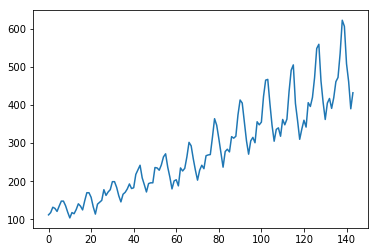

In [4]:
plt.plot(dataset['#Passengers'])
plt.show()

In [5]:
np.random.seed(7)

In [6]:
dataframe = pd.read_csv(data_path, usecols=[1], engine='python', skipfooter=3)
dataset = dataframe.values
dataset = dataset.astype('float32')

In [7]:
dataset

array([[ 112.],
       [ 118.],
       [ 132.],
       [ 129.],
       [ 121.],
       [ 135.],
       [ 148.],
       [ 148.],
       [ 136.],
       [ 119.],
       [ 104.],
       [ 118.],
       [ 115.],
       [ 126.],
       [ 141.],
       [ 135.],
       [ 125.],
       [ 149.],
       [ 170.],
       [ 170.],
       [ 158.],
       [ 133.],
       [ 114.],
       [ 140.],
       [ 145.],
       [ 150.],
       [ 178.],
       [ 163.],
       [ 172.],
       [ 178.],
       [ 199.],
       [ 199.],
       [ 184.],
       [ 162.],
       [ 146.],
       [ 166.],
       [ 171.],
       [ 180.],
       [ 193.],
       [ 181.],
       [ 183.],
       [ 218.],
       [ 230.],
       [ 242.],
       [ 209.],
       [ 191.],
       [ 172.],
       [ 194.],
       [ 196.],
       [ 196.],
       [ 236.],
       [ 235.],
       [ 229.],
       [ 243.],
       [ 264.],
       [ 272.],
       [ 237.],
       [ 211.],
       [ 180.],
       [ 201.],
       [ 204.],
       [ 188.],
       [

In [8]:
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [9]:
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

Add previous data rows as look back features

In [10]:
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

In [11]:
look_back = 2
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
pd.DataFrame(trainX).head(5)

,0,1
0,0.015444,0.027027
1,0.027027,0.054054
2,0.054054,0.048263
3,0.048263,0.032819
4,0.032819,0.059846


In [12]:
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [13]:
trainX.shape, testX.shape

((92, 1), (45, 1))

Including Time steps to the shape before feeding in LSTM

The LSTM network expects the input data (X) to be provided with a specific array structure in the form of: [samples, time steps, features].

Currently, our data is in the form: [samples, features] and we are framing the problem as one time step for each sample. We can transform the prepared train and test input data into the expected structure using numpy.reshape() as follows:

In [14]:
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

# Model 1: Simple LSTM with no Look-Back

In [15]:
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
 - 2s - loss: 0.0404
Epoch 2/100
 - 0s - loss: 0.0200
Epoch 3/100
 - 0s - loss: 0.0146
Epoch 4/100
 - 0s - loss: 0.0135
Epoch 5/100
 - 0s - loss: 0.0124
Epoch 6/100
 - 0s - loss: 0.0116
Epoch 7/100
 - 0s - loss: 0.0105
Epoch 8/100
 - 0s - loss: 0.0096
Epoch 9/100
 - 0s - loss: 0.0086
Epoch 10/100
 - 0s - loss: 0.0075
Epoch 11/100
 - 0s - loss: 0.0066
Epoch 12/100
 - 0s - loss: 0.0056
Epoch 13/100
 - 0s - loss: 0.0049
Epoch 14/100
 - 0s - loss: 0.0041
Epoch 15/100
 - 0s - loss: 0.0035
Epoch 16/100
 - 0s - loss: 0.0030
Epoch 17/100
 - 0s - loss: 0.0027
Epoch 18/100
 - 0s - loss: 0.0024
Epoch 19/100
 - 0s - loss: 0.0022
Epoch 20/100
 - 0s - loss: 0.0021
Epoch 21/100
 - 0s - loss: 0.0020
Epoch 22/100
 - 0s - loss: 0.0020
Epoch 23/100
 - 0s - loss: 0.0020
Epoch 24/100
 - 0s - loss: 0.0020
Epoch 25/100
 - 0s - loss: 0.0019
Epoch 26/100
 - 0s - loss: 0.0020
Epoch 27/100
 - 0s - loss: 0.0020
Epoch 28/100
 - 0s - loss: 0.0019
Epoch 29/100
 - 0s - loss: 0.0019
Epoch 30/100
 - 0s - lo

In [16]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

In [17]:
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

In [18]:
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 22.34 RMSE
Test Score: 45.66 RMSE


In [19]:
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

In [20]:
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

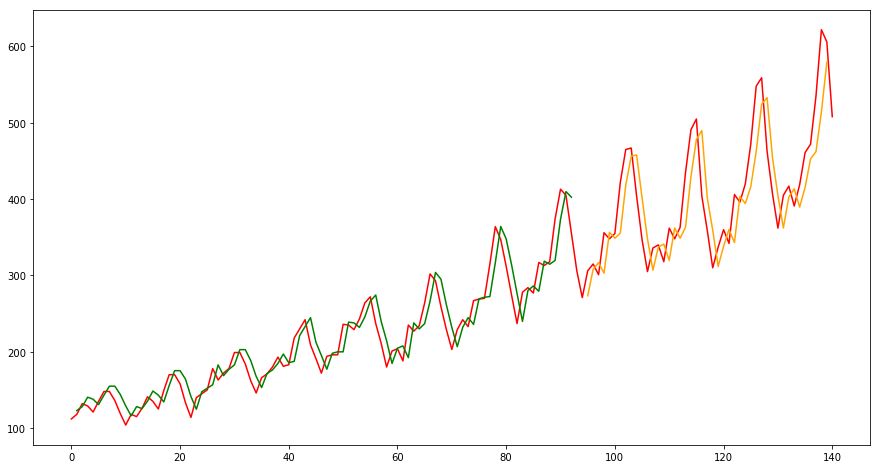

In [21]:
plt.figure(figsize=(15,8))
plt.plot(scaler.inverse_transform(dataset), color='red')
plt.plot(trainPredictPlot, color='green')
plt.plot(testPredictPlot, color='orange')

# Model 2: Window Method

In [22]:
look_back = 2
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [23]:
pd.DataFrame(trainX).head(5)

,0,1
0,0.015444,0.027027
1,0.027027,0.054054
2,0.054054,0.048263
3,0.048263,0.032819
4,0.032819,0.059846


In [24]:
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [25]:
trainX

array([[[ 0.01544401,  0.02702703]],

       [[ 0.02702703,  0.05405405]],

       [[ 0.05405405,  0.04826255]],

       [[ 0.04826255,  0.03281853]],

       [[ 0.03281853,  0.05984557]],

       [[ 0.05984557,  0.08494207]],

       [[ 0.08494207,  0.08494207]],

       [[ 0.08494207,  0.06177607]],

       [[ 0.06177607,  0.02895753]],

       [[ 0.02895753,  0.        ]],

       [[ 0.        ,  0.02702703]],

       [[ 0.02702703,  0.02123553]],

       [[ 0.02123553,  0.04247104]],

       [[ 0.04247104,  0.07142857]],

       [[ 0.07142857,  0.05984557]],

       [[ 0.05984557,  0.04054055]],

       [[ 0.04054055,  0.08687258]],

       [[ 0.08687258,  0.12741312]],

       [[ 0.12741312,  0.12741312]],

       [[ 0.12741312,  0.10424709]],

       [[ 0.10424709,  0.05598456]],

       [[ 0.05598456,  0.01930502]],

       [[ 0.01930502,  0.06949806]],

       [[ 0.06949806,  0.07915059]],

       [[ 0.07915059,  0.08880308]],

       [[ 0.08880308,  0.14285713]],

       [[ 0.

In [26]:
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=0)

In [27]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

In [28]:
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

In [29]:
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 23.90 RMSE
Test Score: 48.71 RMSE


In [30]:
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

In [31]:
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

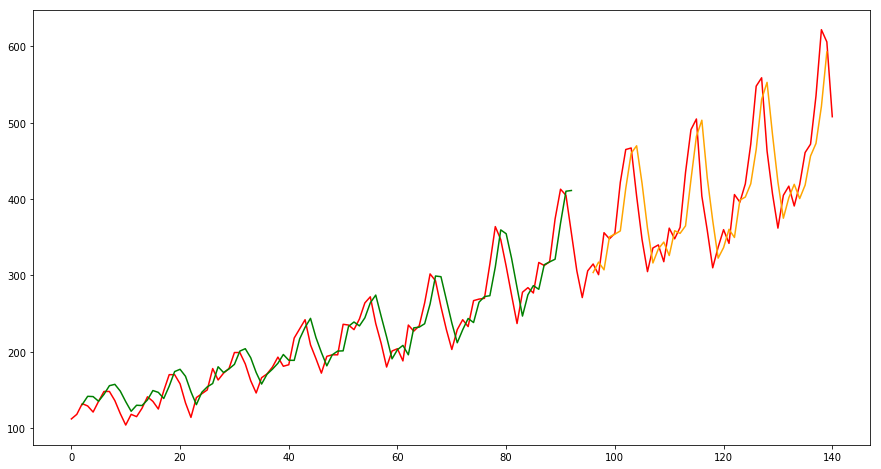

In [32]:
plt.figure(figsize=(15,8))
plt.plot(scaler.inverse_transform(dataset), color='red')
plt.plot(trainPredictPlot, color='green')
plt.plot(testPredictPlot, color='orange')

# Model 3: Regression with Time Steps

In [33]:
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [35]:
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))

In [36]:
trainX

array([[[ 0.01544401],
        [ 0.02702703],
        [ 0.05405405]],

       [[ 0.02702703],
        [ 0.05405405],
        [ 0.04826255]],

       [[ 0.05405405],
        [ 0.04826255],
        [ 0.03281853]],

       [[ 0.04826255],
        [ 0.03281853],
        [ 0.05984557]],

       [[ 0.03281853],
        [ 0.05984557],
        [ 0.08494207]],

       [[ 0.05984557],
        [ 0.08494207],
        [ 0.08494207]],

       [[ 0.08494207],
        [ 0.08494207],
        [ 0.06177607]],

       [[ 0.08494207],
        [ 0.06177607],
        [ 0.02895753]],

       [[ 0.06177607],
        [ 0.02895753],
        [ 0.        ]],

       [[ 0.02895753],
        [ 0.        ],
        [ 0.02702703]],

       [[ 0.        ],
        [ 0.02702703],
        [ 0.02123553]],

       [[ 0.02702703],
        [ 0.02123553],
        [ 0.04247104]],

       [[ 0.02123553],
        [ 0.04247104],
        [ 0.07142857]],

       [[ 0.04247104],
        [ 0.07142857],
        [ 0.05984557]],

      

In [37]:
model = Sequential()
model.add(LSTM(4, input_shape=(look_back, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
 - 1s - loss: 0.0160
Epoch 2/100
 - 0s - loss: 0.0076
Epoch 3/100
 - 0s - loss: 0.0064
Epoch 4/100
 - 0s - loss: 0.0055
Epoch 5/100
 - 0s - loss: 0.0048
Epoch 6/100
 - 0s - loss: 0.0043
Epoch 7/100
 - 0s - loss: 0.0038
Epoch 8/100
 - 0s - loss: 0.0036
Epoch 9/100
 - 0s - loss: 0.0035
Epoch 10/100
 - 0s - loss: 0.0034
Epoch 11/100
 - 0s - loss: 0.0033
Epoch 12/100
 - 0s - loss: 0.0034
Epoch 13/100
 - 0s - loss: 0.0033
Epoch 14/100
 - 0s - loss: 0.0032
Epoch 15/100
 - 0s - loss: 0.0033
Epoch 16/100
 - 0s - loss: 0.0032
Epoch 17/100
 - 0s - loss: 0.0032
Epoch 18/100
 - 0s - loss: 0.0032
Epoch 19/100
 - 0s - loss: 0.0031
Epoch 20/100
 - 0s - loss: 0.0032
Epoch 21/100
 - 0s - loss: 0.0031
Epoch 22/100
 - 0s - loss: 0.0032
Epoch 23/100
 - 0s - loss: 0.0032
Epoch 24/100
 - 0s - loss: 0.0033
Epoch 25/100
 - 0s - loss: 0.0031
Epoch 26/100
 - 0s - loss: 0.0031
Epoch 27/100
 - 0s - loss: 0.0031
Epoch 28/100
 - 0s - loss: 0.0030
Epoch 29/100
 - 0s - loss: 0.0031
Epoch 30/100
 - 0s - lo

In [38]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

In [39]:
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

In [40]:
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 22.00 RMSE
Test Score: 46.44 RMSE


In [42]:
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

In [44]:
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

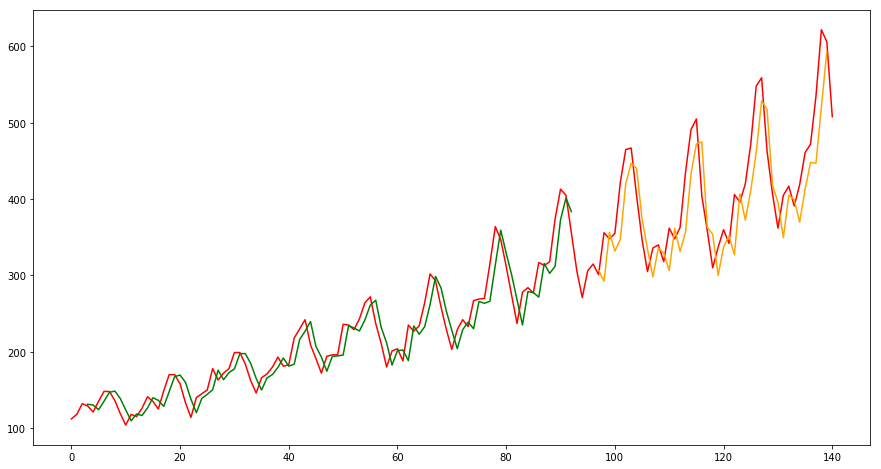

In [46]:
plt.figure(figsize=(15,8))
plt.plot(scaler.inverse_transform(dataset), color='red')
plt.plot(trainPredictPlot, color='green')
plt.plot(testPredictPlot, color='orange')